# ECSE415 Assignment 2
## Sameen Mahtab 260737048 

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import image
book = cv2.imread("book.jpg")
book_c = book.copy()
#convert to RGB
book = cv2.cvtColor(book, cv2.COLOR_BGR2RGB)
book_c = cv2.cvtColor(book_c, cv2.COLOR_BGR2RGB)

### 1.1 Invariance Under Changes in Scale

In [3]:
#create SIFT object
sift = cv2.xfeatures2d.SIFT_create()
sift_keypoints = sift.detect(book, None)

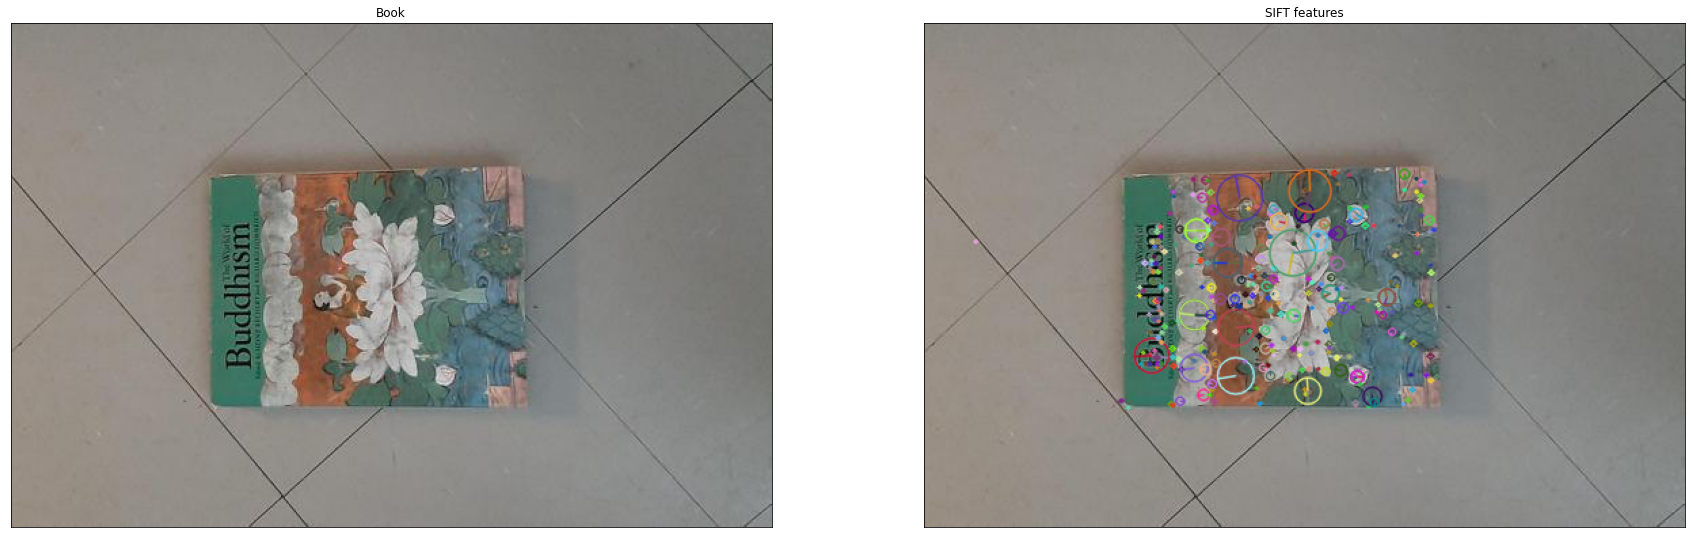

Number of keypoints: 382


In [4]:
#draw keypoints
cv2.drawKeypoints(book, sift_keypoints, book_c, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#display
plt.figure(figsize=(30,30))
plt.subplot(121), plt.imshow(book, cmap='gray')
plt.title("Book"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(book_c)
plt.title("SIFT features"), plt.xticks([]), plt.yticks([])
plt.show()

print("Number of keypoints: " + str(len(sift_keypoints)))

In [5]:
#Scaling the reference images

scale_factors = [0.2, 0.5, 0.8, 1.25, 2, 5]
scaled_list = []
book_copy = book.copy()

sc_keypoints = [] 
sc_descriptors = []

match = []
bf = cv2.BFMatcher()

#Keypoint and descriptor for the original image
keypoints, descriptors = sift.detectAndCompute(book, None)

#Append scaled images to the list and find the keypoints and descriptors
for scale in scale_factors:
    scaled_list.append(cv2.resize(book,None,fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR))
    
for img in scaled_list:    
    #find and store Keypoint and descriptor for the scaled image
    kp, des = sift.detectAndCompute(img, None)
    sc_keypoints.append(kp)
    sc_descriptors.append(des)

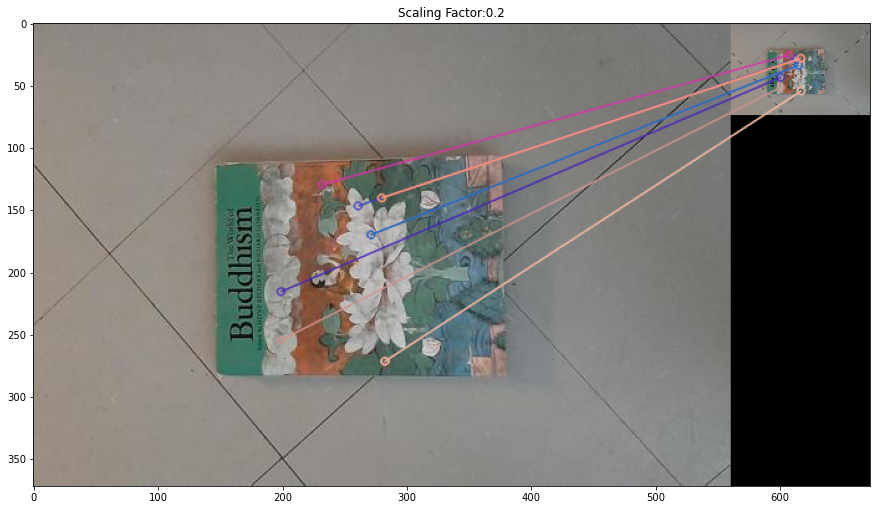

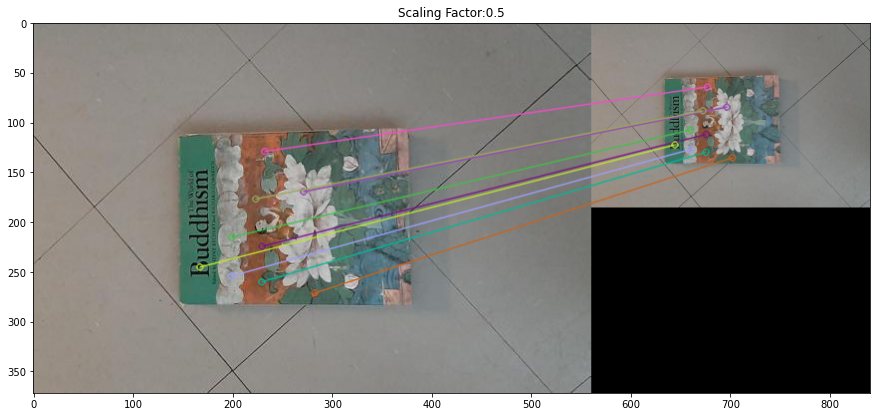

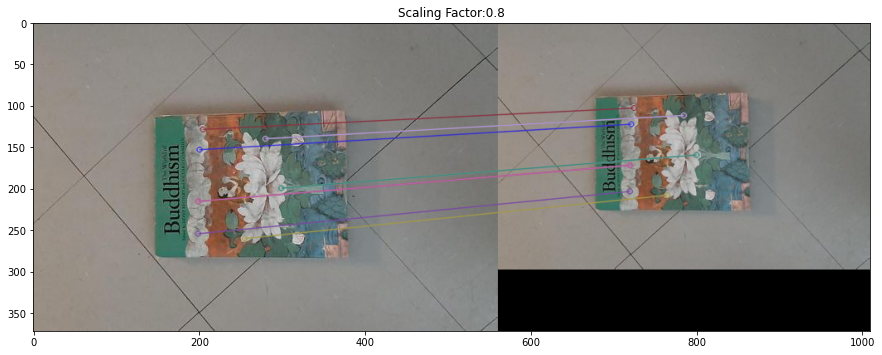

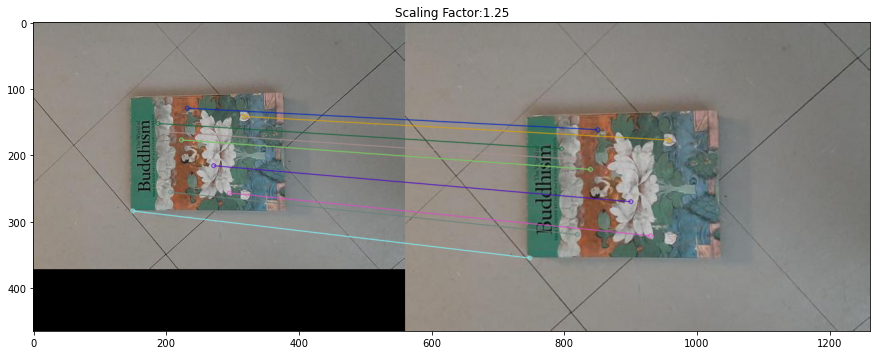

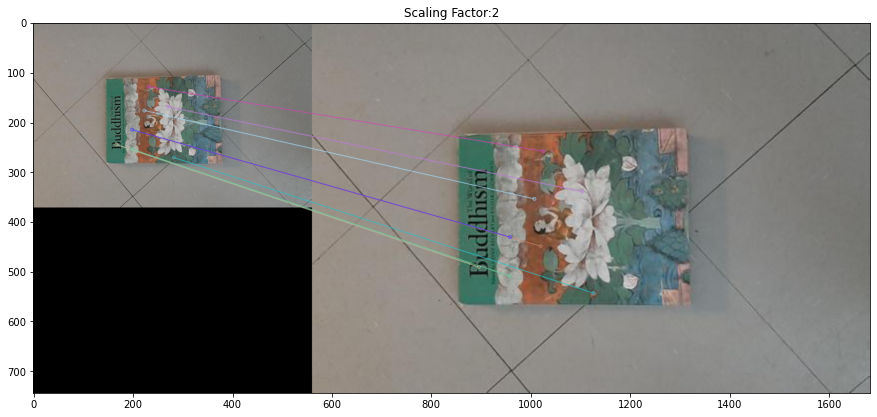

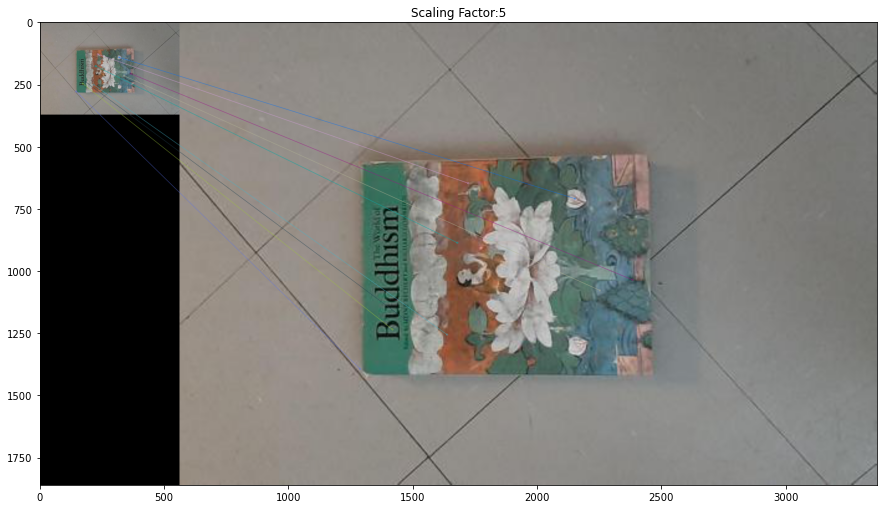

In [6]:
#Match and sort keypoints of reference image to scales image using brute force method
for d in sc_descriptors:
    match.append(bf.match(descriptors, d))

sort = []
for sm in match:
    sort.append(sorted(sm, key = lambda x:x.distance))

#Display top 10 keypoints for each pair
for index in range(len(scaled_list)):
    dis_img = cv2.drawMatches(book, keypoints, scaled_list[index], sc_keypoints[index], sort[index][:10], None, flags=2)
    plt.figure(figsize=(15,15))
    plt.imshow(dis_img), plt.title("Scaling Factor:{img_sf}".format(img_sf=scale_factors[index]))
    plt.show()  

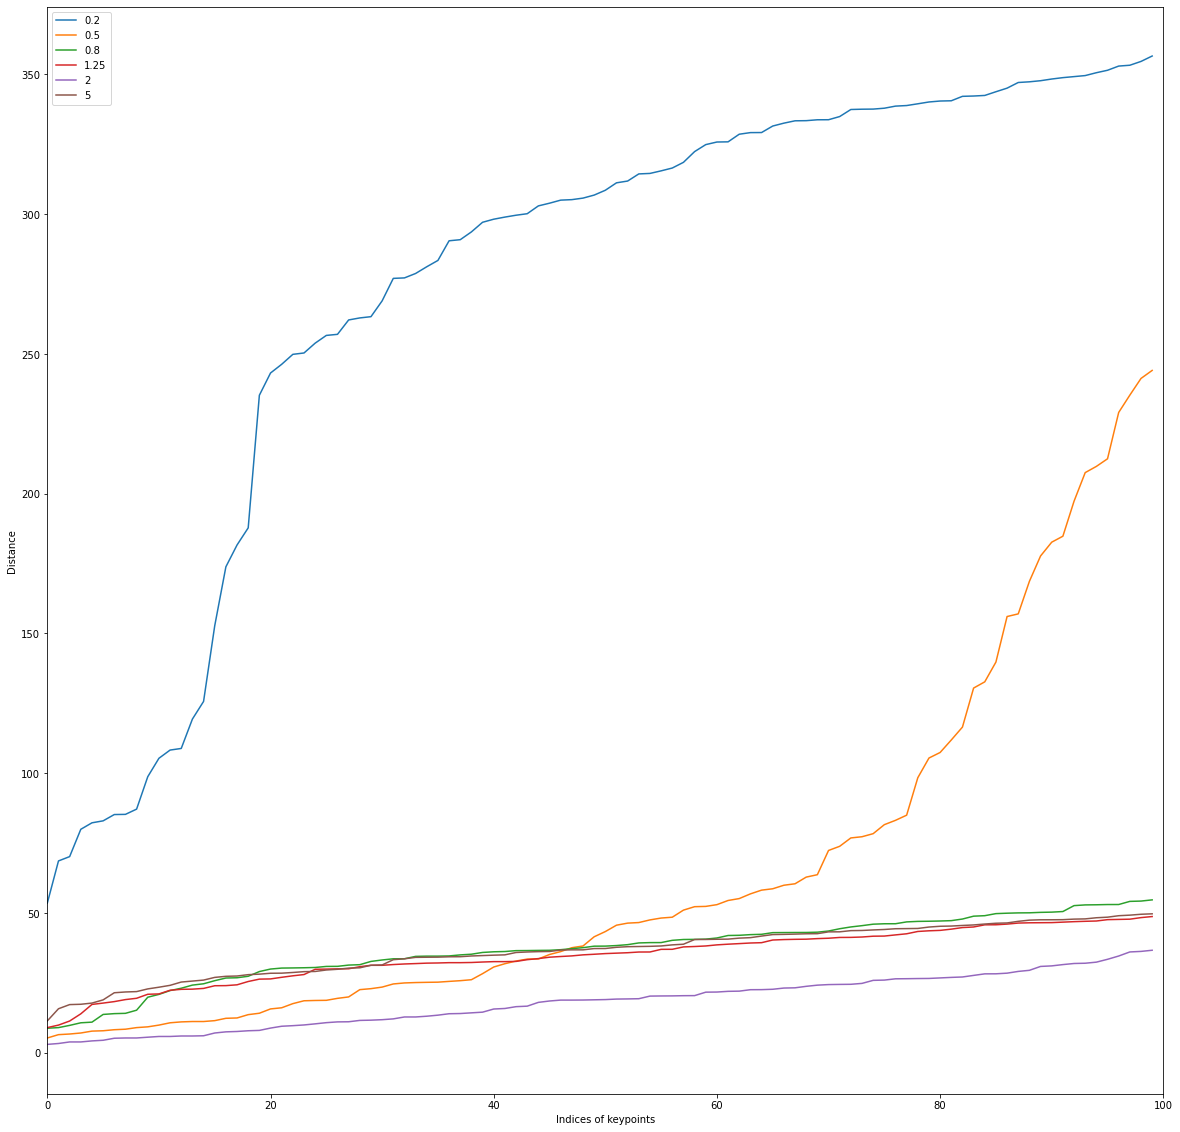

In [7]:
plt.figure(figsize=(20,20))
plt.xlim([0,100]) #x-axis limit
for srt, sf in zip(sort, scale_factors):
    plt.plot([m.distance for m in srt[:100]], label=sf)
plt.legend()
plt.ylabel("Distance")
plt.xlabel("Indices of keypoints")
plt.show()

1.18. Discuss the trend in the plotted results. What is the effect of increasing the scale on the matching distance? Reason the cause. 

As seen in the graph, when the scale is very high, the distances of the lower indices increase rapidly, this shows that it is a poorer result. On the other hand when the scale is close to 1, like 0.8 or 1.25, the lower indices have lower distances and are therefore more suitable for matching with larger keypoints. This is due to overscaling.If we scaale the image too much the neighbour pixel will change and so there will be a larger variance. 

### 1.2 Invariance under rotation

In [8]:

#import image
book = cv2.imread("book.jpg")
#bookshow = plt.imshow(book, cmap='gray')
book_c = book.copy()
#convert to RGB
book = cv2.cvtColor(book, cv2.COLOR_BGR2RGB)
book_c = cv2.cvtColor(book_c, cv2.COLOR_BGR2RGB)

sift = cv2.xfeatures2d.SIFT_create()
sift_keypoints = sift.detect(book, None)

keypoints, descriptors = sift.compute(book, keypoints)
print("# keypoints:" + str(len(keypoints)))

# keypoints:382


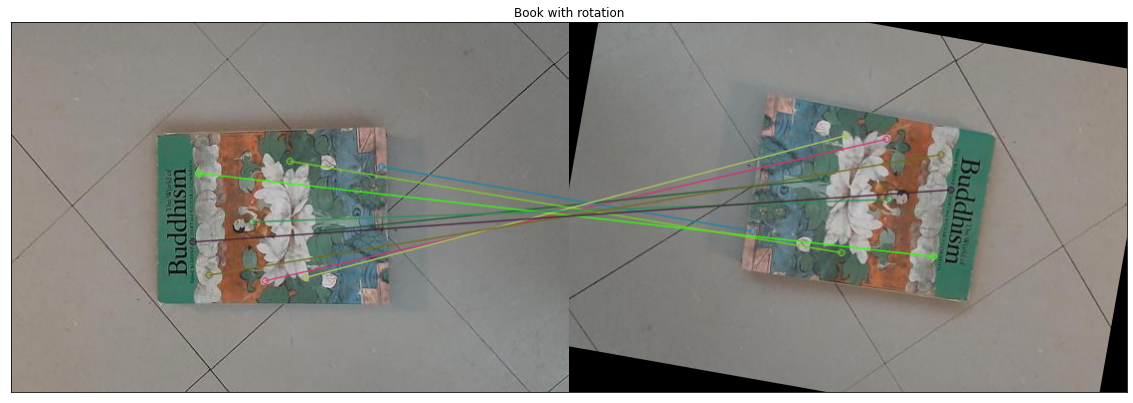

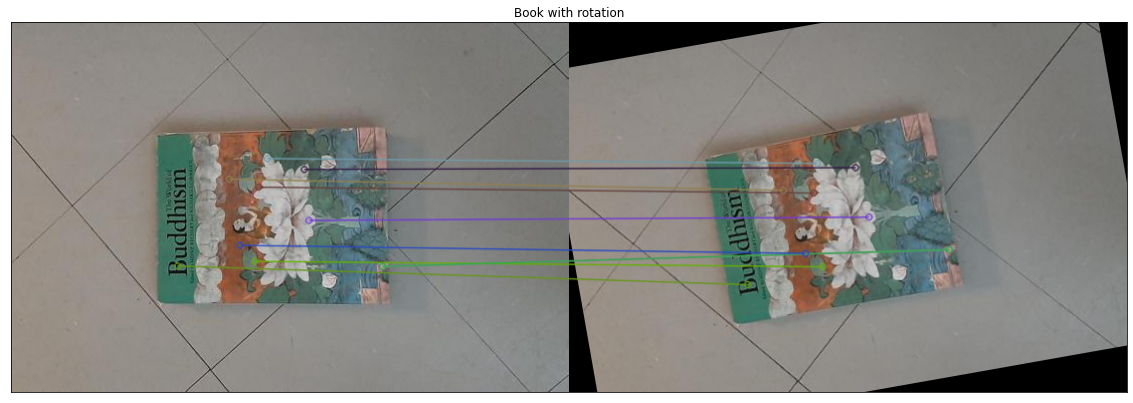

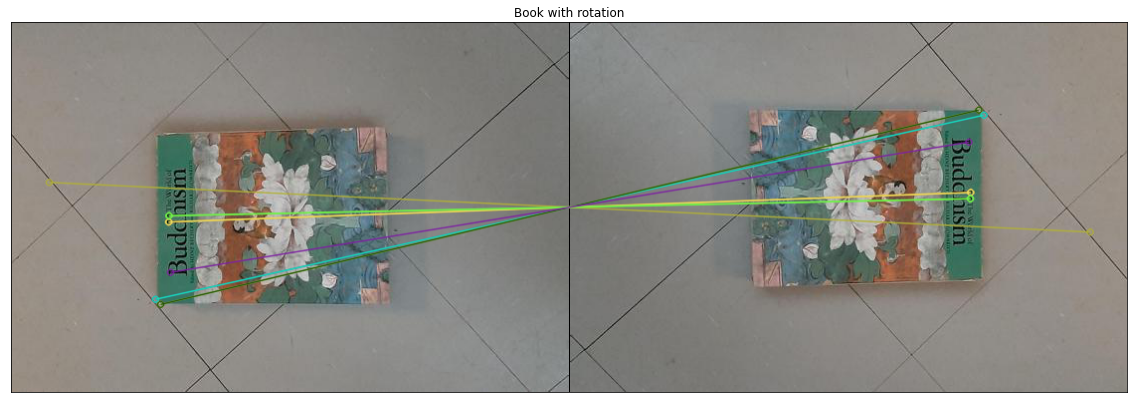

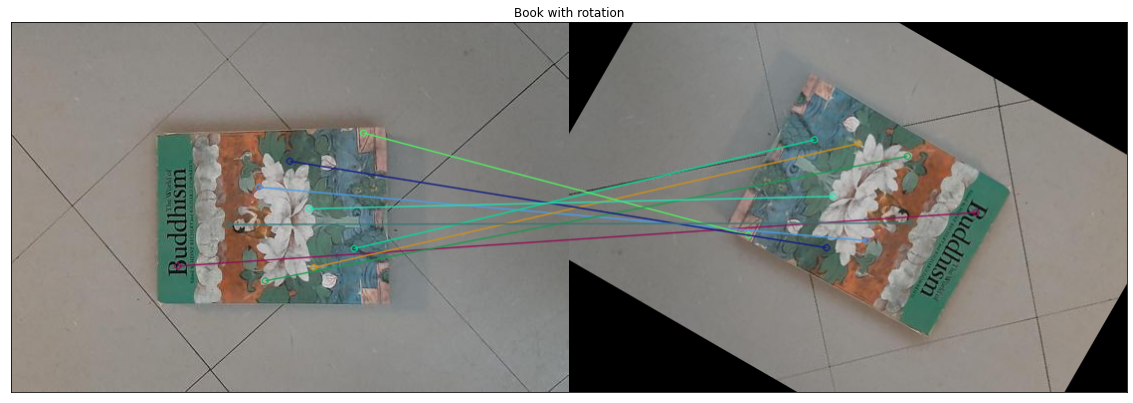

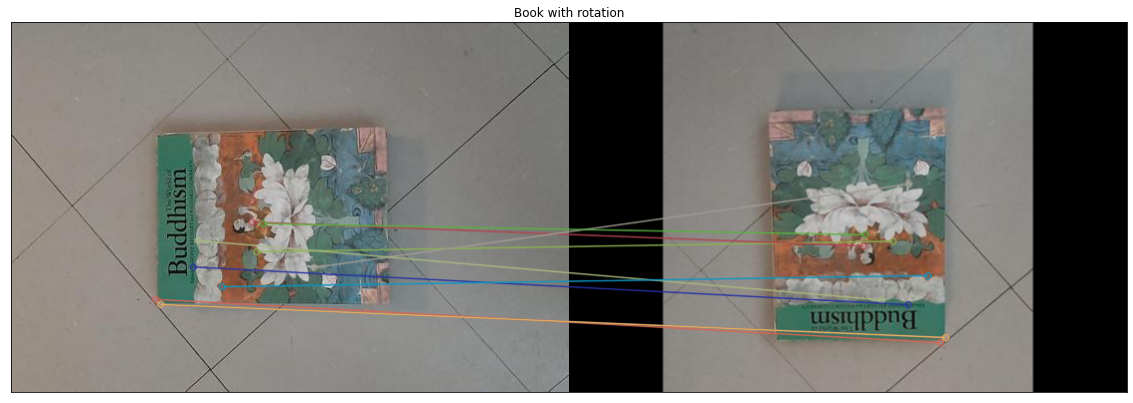

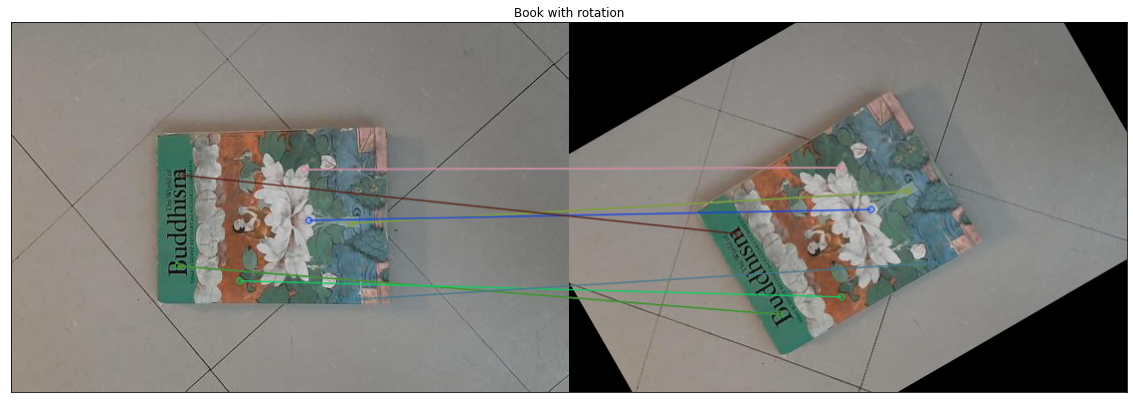

In [9]:
#rotate the image
rot = {10,30,90,150,170,180}
rotated_book = {}
height, width = book.shape[0:2]
list_m = []

for r in rot:
    #Rotate image
    rotated = cv2.getRotationMatrix2D((width/2, height/2), r, 1)
    rotated_book[r] = cv2.warpAffine(book, rotated, (width,height))
    rotated_book_c = rotated_book[r].copy()
    #Detect Sift features with no mask
    k,d = sift.detectAndCompute(book_c, None)
    rot_keypoints, rot_descriptors = sift.detectAndCompute(rotated_book_c, None)
    
    bf = cv2.BFMatcher()
    #Match the descriptors
    match = bf.match(descriptors, rot_descriptors)
    #Sort the matching keypoints
    match = sorted(match, key = lambda x:x.distance)
    #Display the 10 most matched keypoints
    mat = cv2.drawMatches(book_c, keypoints, rotated_book_c, rot_keypoints, match[:10], None, flags=2)
    #plot
    plt.figure(figsize=(20,20))
    plt.imshow(mat)
    plt.title("Book with rotation"), plt.xticks([]), plt.yticks([])
    plt.show()
    
    list_m.append(match)


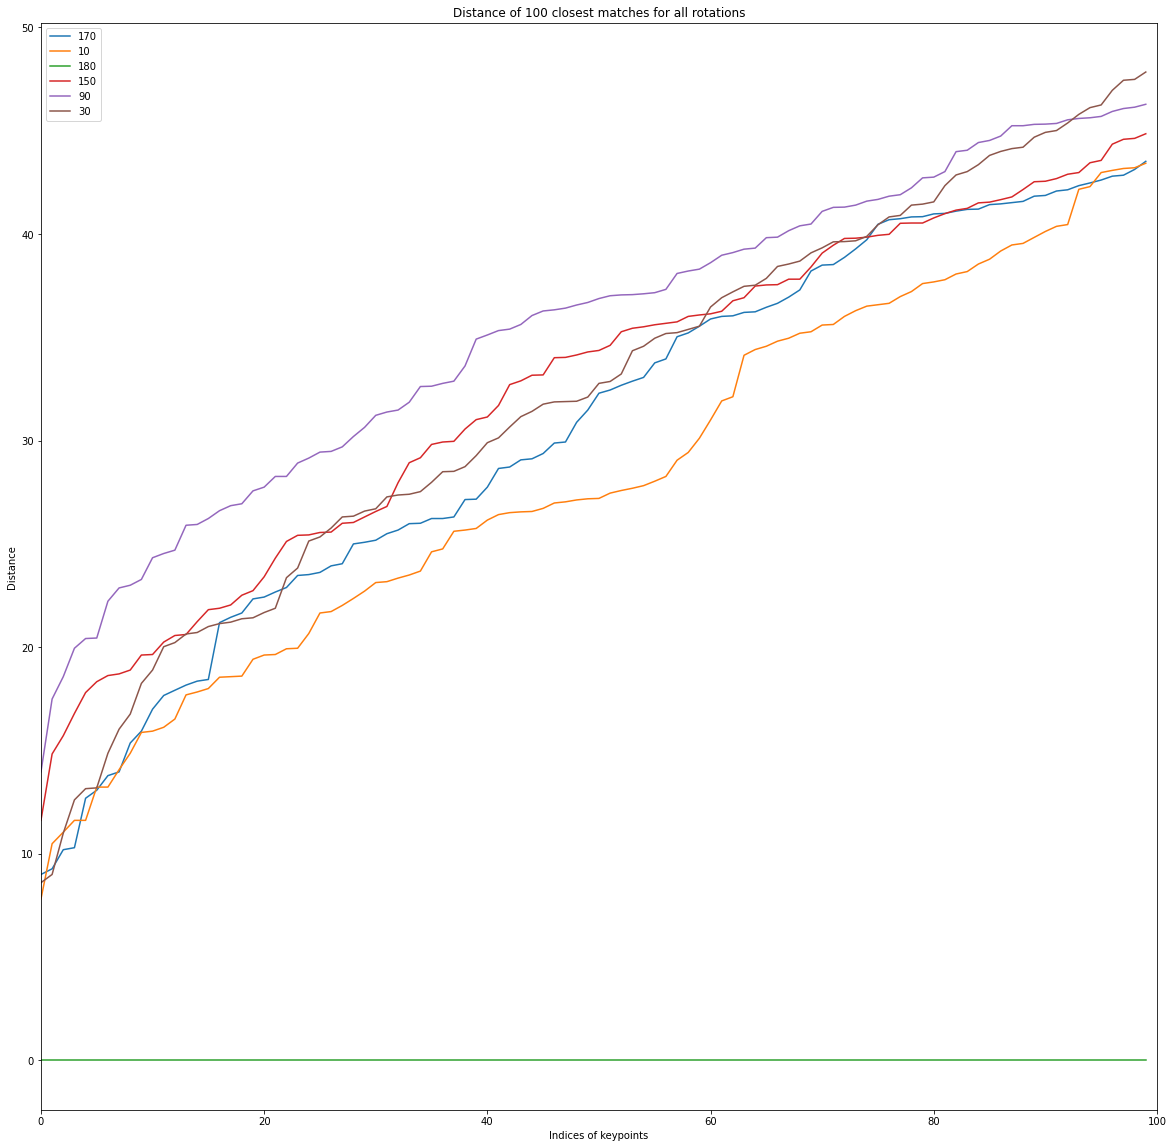

In [10]:
plt.figure(figsize=(20,20))
plt.xlim([0,100]) #x-axis limit
plt.title("Distance of 100 closest matches for all rotations")
for l, r in zip(list_m, rot):
    plt.plot([m.distance for m in l[:100]], label=r)
plt.legend()
plt.ylabel("Distance")
plt.xlabel("Indices of keypoints")
plt.show()

1.2.8. Discuss the trend in the plotted results. What is the effect of increasing the angle of rotation on the matching distance? Reason the cause.

Each match object contains the attribute 'distance'. Lower the distance the better.With increasing degree of rotation, the distance of the rotation increases. As the degree of rotation increases, the graph becomes more curved. For a 180 degree rotation, the graph is horozontal and flat, this is because it is the same picture just flipped. 

In [11]:
####part2####
#Matching using SIFT - book reveal
#load the image and convert to RGB
book_occluded = cv2.imread("book_occlusion.jpg")
book_occluded_c = book_occluded.copy()
book_cropped = cv2.imread("book_crop.jpg")
book_cropped_c = book_cropped.copy()
book_occluded = cv2.cvtColor(book_occluded, cv2.COLOR_BGR2RGB)
book_cropped = cv2.cvtColor(book_cropped, cv2.COLOR_BGR2RGB)
book_cropped_c = cv2.cvtColor(book_cropped_c, cv2.COLOR_BGR2RGB)
book_occluded_c = cv2.cvtColor(book_occluded_c, cv2.COLOR_BGR2RGB)

sift = cv2.xfeatures2d.SIFT_create()
bf = cv2.BFMatcher()

#SIFT features with no mask
keypoints_o, descriptors_o = sift.detectAndCompute(book_occluded_c, None)
keypoints_c, descriptors_c = sift.detectAndCompute(book_cropped_c, None)

In [12]:
match = bf.match(descriptors_o, descriptors_c)

#sort
match = sorted(match, key = lambda x:x.distance) 

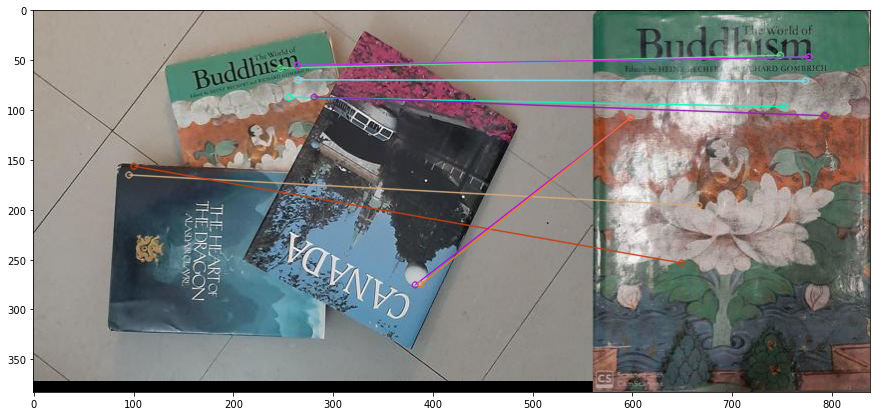

In [13]:
#top 10 matching keypoints
dis_image = cv2.drawMatches(book_occluded_c, keypoints_o, book_cropped_c, keypoints_c,  match[:10], None, flags=2)

plt.figure(figsize=(15,15))
plt.imshow(dis_image)
plt.show()

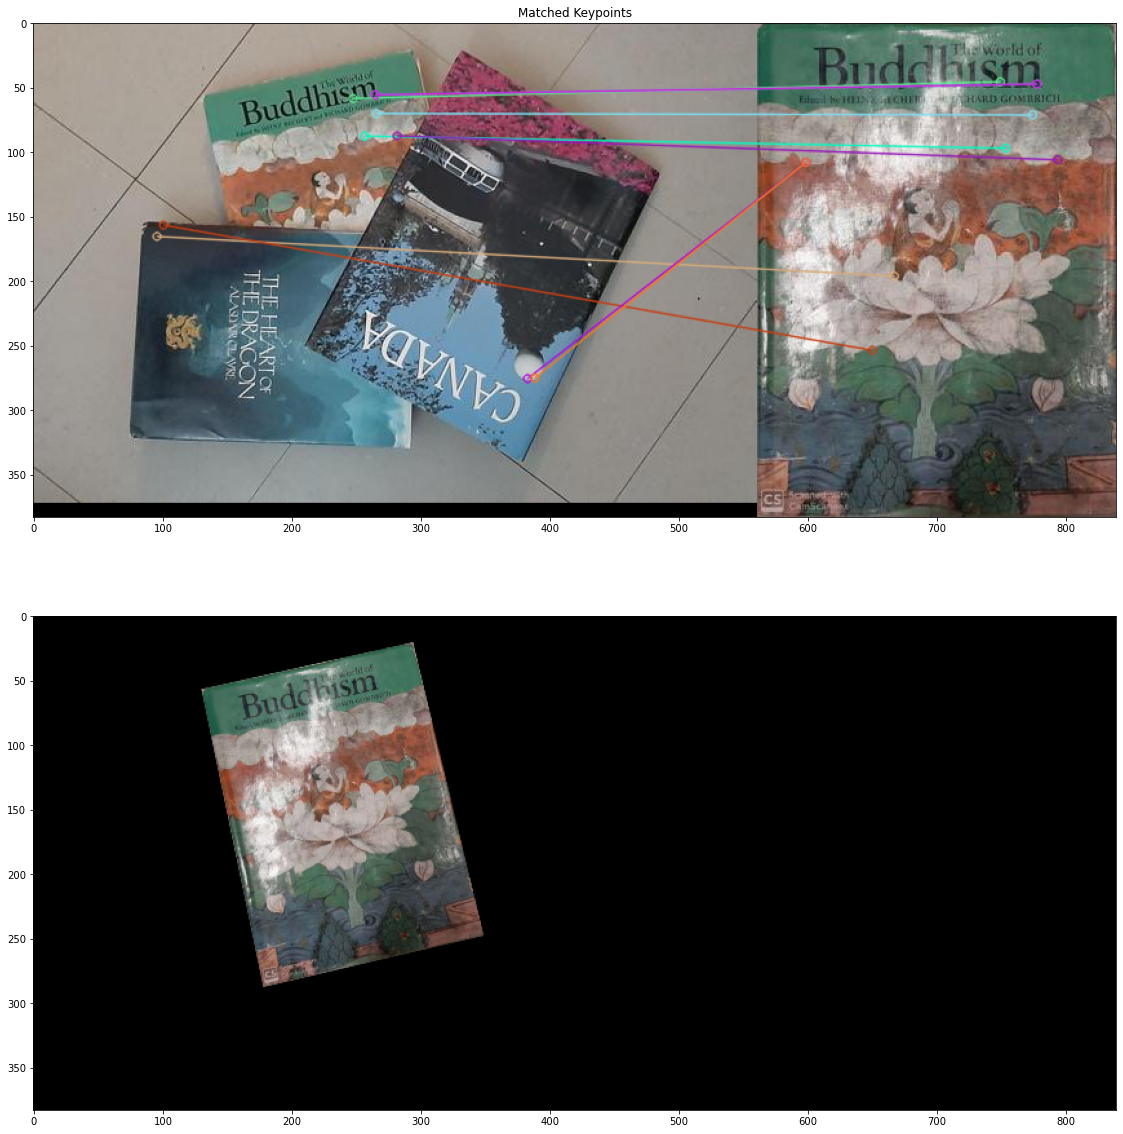

In [17]:
# Compute a homography to align the images using RANSAC method and apply the transformation on the reference image.

GoodMatches = []
for i, mat in enumerate(match):
    if mat.distance<200:
        GoodMatches.append((mat.trainIdx, mat.queryIdx))
        
occlusion_m = np.float32([keypoints_o[i].pt for (__, i) in GoodMatches])
crop_m = np.float32([keypoints_c[i].pt for (i, __) in GoodMatches])

#finging Homography and wrapping image
H, __ = cv2.findHomography(crop_m, occlusion_m, cv2.RANSAC, 1)

wimg = cv2.warpPerspective(book_cropped_c, H, (book_occluded_c.shape[1]+book_cropped_c.shape[1]
                                                   ,book_cropped_c.shape[0]))

plt.figure(figsize=(20,20))
plt.subplot(211)
plt.imshow(dis_image)
plt.title("Matched Keypoints")
plt.subplot(212)
plt.imshow(wimg)
plt.show()